In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'  # 사용하고자 하는 한글 폰트명으로 변경

In [14]:
data = pd.read_csv('23하 디지털,IT 학회연계 프로그램_과제 데이터(디지털혁신팀) (1).csv',encoding='utf-8')
# data2 = pd.read_csv('안드로이드 금융앱 Top50_sample.csv')
# data3 = pd.read_csv('테이블정의서_금융앱이용자수.csv', encoding='utf-8')


In [15]:
data.head()

,Age,Gender,Company,Education_level,Asset,Domestic_Stock_Ratio,Foreign_Stock_Ratio,Cash_Ratio
0,25,F,M-able,High School,5100000,0.80,0.19,0.01
1,20,M,M-able,University,3400000,0.74,0.14,0.12
2,23,M,Toss,University,3000000,0.67,0.12,0.21
3,23,F,namuh,University,1300000,0.40,0.37,0.23
4,27,F,Toss,University,5400000,0.31,0.09,0.60


In [16]:
data



,Age,Gender,Company,Education_level,Asset,Domestic_Stock_Ratio,Foreign_Stock_Ratio,Cash_Ratio
0,25,F,M-able,High School,5100000,0.80,0.19,0.01
1,20,M,M-able,University,3400000,0.74,0.14,0.12
2,23,M,Toss,University,3000000,0.67,0.12,0.21
3,23,F,namuh,University,1300000,0.40,0.37,0.23
4,27,F,Toss,University,5400000,0.31,0.09,0.60
...,...,...,...,...,...,...,...,...
9995,32,F,M-able,University,39800000,0.00,0.26,0.74
9996,38,F,M-able,University,216800000,0.23,0.60,0.17
9997,30,M,namuh,University,25900000,0.07,0.24,0.69
9998,38,F,Toss,University,278000000,0.34,0.39,0.27


In [20]:
data.shape

(10000, 8)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  int64  
 1   Gender                10000 non-null  object 
 2   Company               10000 non-null  object 
 3   Education_level       10000 non-null  object 
 4   Asset                 10000 non-null  int64  
 5   Domestic_Stock_Ratio  10000 non-null  float64
 6   Foreign_Stock_Ratio   10000 non-null  float64
 7   Cash_Ratio            10000 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [24]:
data.describe()

,Age,Asset,Domestic_Stock_Ratio,Foreign_Stock_Ratio,Cash_Ratio
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,31.323700,6.428656e+07,0.499166,0.228609,0.272225
std,5.544835,8.446995e+07,0.287558,0.188189,0.231101
min,20.000000,1.000000e+05,0.000000,0.000000,0.000000
25%,27.000000,6.100000e+06,0.250000,0.070000,0.080000
50%,32.000000,2.400000e+07,0.500000,0.180000,0.210000
75%,36.000000,9.935000e+07,0.750000,0.360000,0.420000
max,39.000000,2.998000e+08,1.000000,0.700000,1.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Asset'}>],
       [<AxesSubplot:title={'center':'Domestic_Stock_Ratio'}>,
        <AxesSubplot:title={'center':'Foreign_Stock_Ratio'}>],
       [<AxesSubplot:title={'center':'Cash_Ratio'}>, <AxesSubplot:>]],
      dtype=object)

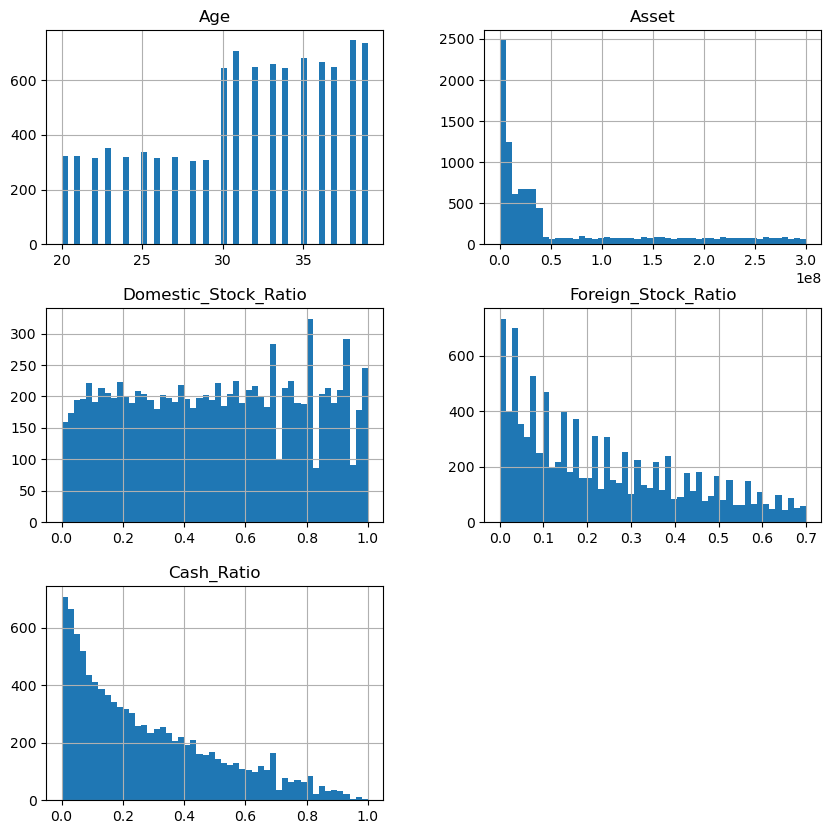

In [23]:
data.hist(bins=50, figsize=(10, 10))

<AxesSubplot:xlabel='Asset', ylabel='Count'>

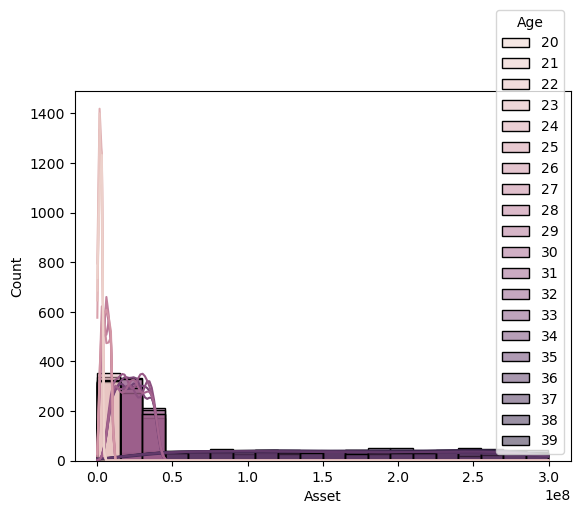

In [86]:
# 나이대별 자산

sns.histplot(data=data, x='Asset', hue='Age', bins=20, kde=True)

<AxesSubplot:xlabel='Age', ylabel='Asset'>

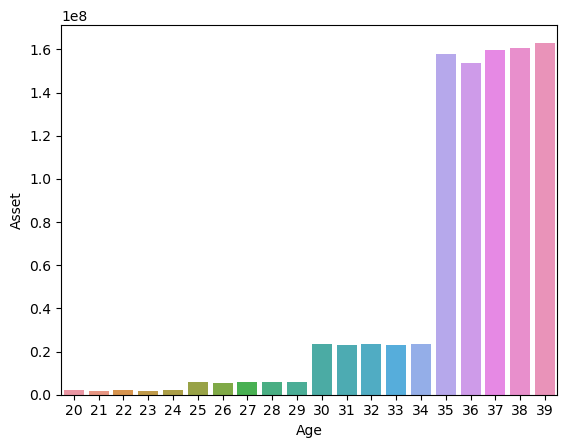

In [127]:
# 나이별 평균 자산
data_age_asset_avg = data[['Age', 'Asset']].groupby('Age')['Asset'].mean().reset_index()
sns.barplot(data=data_age_asset_avg, x='Age', y='Asset')


<AxesSubplot:ylabel='Company'>

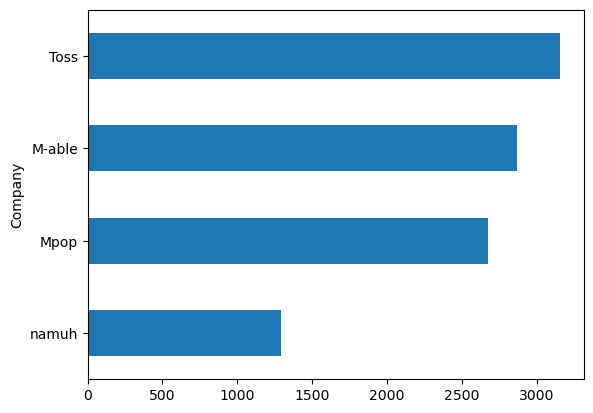

In [130]:
# 많이 이용하는 Company

data_age_company = pd.DataFrame(data[['Age', 'Company']]).groupby('Company')['Age'].agg('count')
data_age_company.sort_values().plot(kind='barh')

<Figure size 1200x600 with 0 Axes>

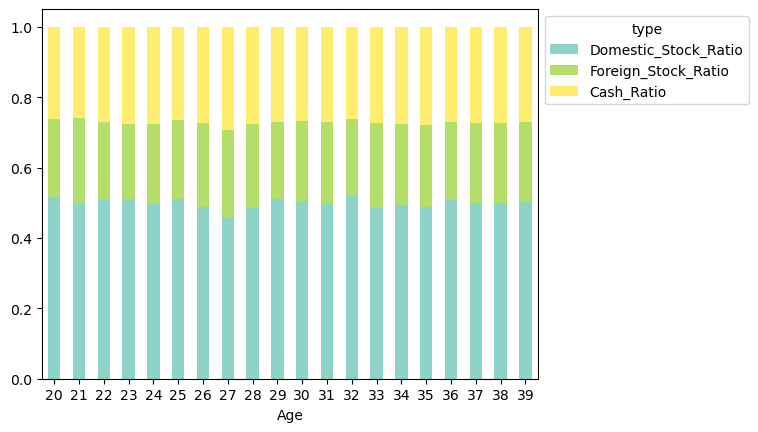

In [140]:
# 나이별 평균 국내 주식 비율, 해외 주식 비율, 현금 비율 계산
average_ratios_by_age = data.groupby('Age')[['Domestic_Stock_Ratio', 'Foreign_Stock_Ratio', 'Cash_Ratio']].mean()


plt.figure(figsize=(12, 6))
average_ratios_by_age.plot(kind='bar', stacked=True, colormap='Set3')

plt.legend(title='type', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Asset'>

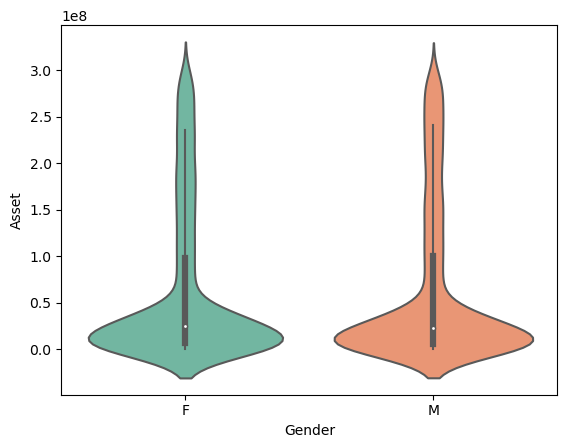

In [145]:
# 성별 자산

sns.violinplot(data=data, x='Gender', y='Asset', palette='Set2')

<AxesSubplot:xlabel='Education_level', ylabel='Asset'>

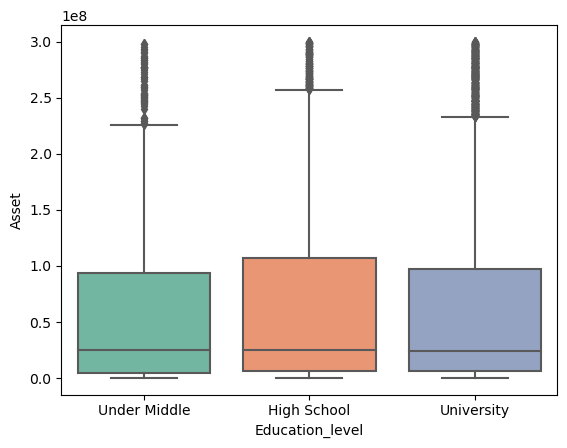

In [154]:
# 교육 수준 별 자산
order = ['Under Middle', 'High School', 'University']
sns.boxplot(data=data, x='Education_level', y='Asset', palette='Set2', order=order)

<AxesSubplot:xlabel='Education_level', ylabel='Asset'>

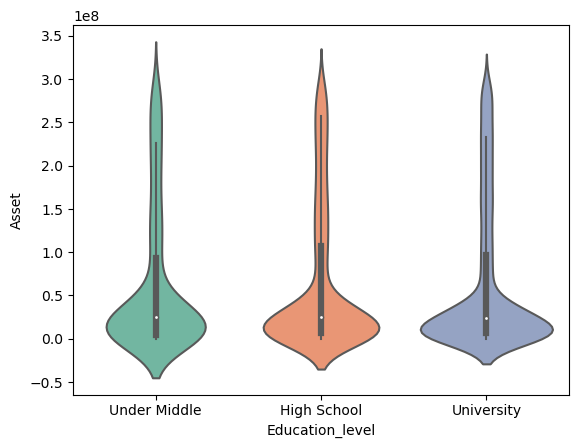

In [155]:
# 교육 수준 별 자산

sns.violinplot(data=data, x='Education_level', y='Asset', palette='Set2', order=order)


<Figure size 1200x600 with 0 Axes>

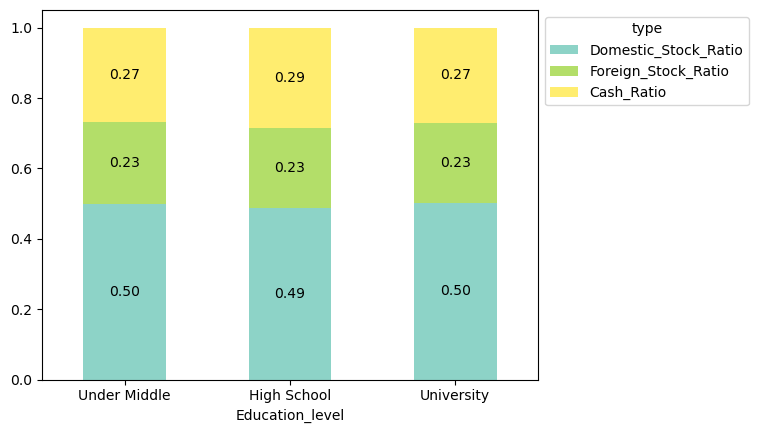

In [159]:
# 교육 수준 별 국내주식, 해외주식, 현금 비율

data_edu_level_ratio = data.groupby('Education_level')[['Domestic_Stock_Ratio', 'Foreign_Stock_Ratio', 'Cash_Ratio']].mean()

plt.figure(figsize=(12, 6))

ax = data_edu_level_ratio.plot(kind='bar', stacked=True, colormap='Set3', xticks=range(len(order)))

ax.set_xticklabels(order)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center')




plt.legend(title='type', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()





In [161]:
# 자산과 국내주식, 해외주식, 현금 비율 간의 상관관계

data[['Asset', 'Domestic_Stock_Ratio', 'Foreign_Stock_Ratio', 'Cash_Ratio']].corr()

,Asset,Domestic_Stock_Ratio,Foreign_Stock_Ratio,Cash_Ratio
Asset,1.000000,-0.001837,-0.003817,0.005394
Domestic_Stock_Ratio,-0.001837,1.000000,-0.597769,-0.757520
Foreign_Stock_Ratio,-0.003817,-0.597769,1.000000,-0.070516
Cash_Ratio,0.005394,-0.757520,-0.070516,1.000000


<AxesSubplot:>

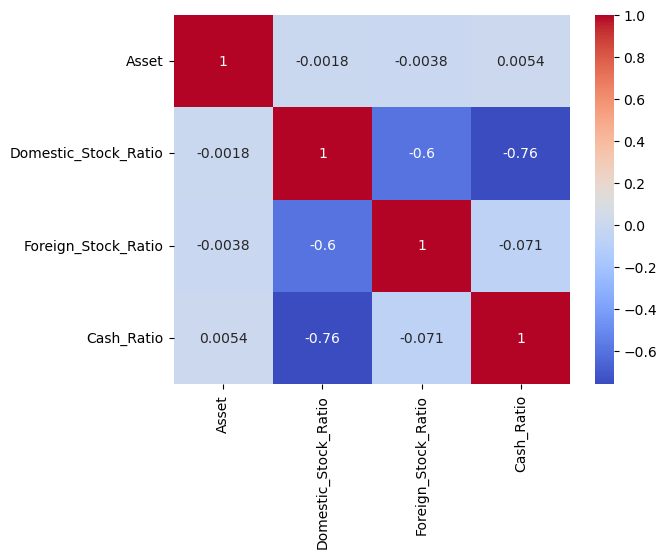

In [163]:
sns.heatmap(data[['Asset', 'Domestic_Stock_Ratio', 'Foreign_Stock_Ratio', 'Cash_Ratio']].corr(), annot=True, cmap='coolwarm')

In [50]:
data.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_24400\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Asset,Domestic_Stock_Ratio,Foreign_Stock_Ratio,Cash_Ratio
Age,1.000000,0.676010,-0.004085,0.001188,0.004115
Asset,0.676010,1.000000,-0.001837,-0.003817,0.005394
Domestic_Stock_Ratio,-0.004085,-0.001837,1.000000,-0.597769,-0.757520
Foreign_Stock_Ratio,0.001188,-0.003817,-0.597769,1.000000,-0.070516
Cash_Ratio,0.004115,0.005394,-0.757520,-0.070516,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_24400\3774853014.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


<AxesSubplot:>

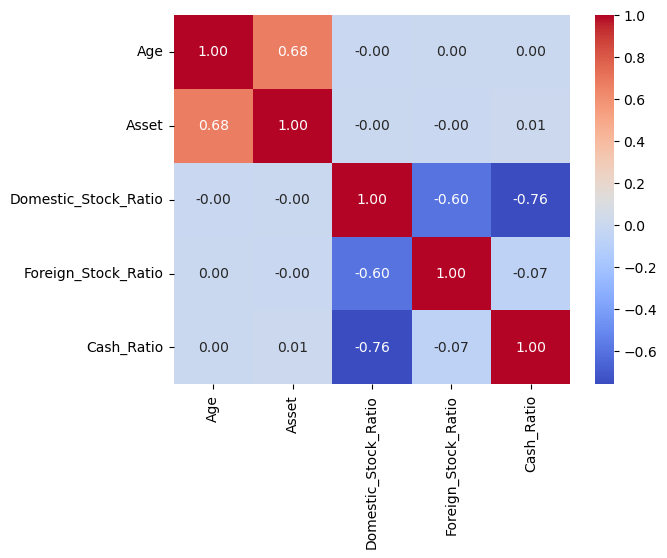

In [61]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

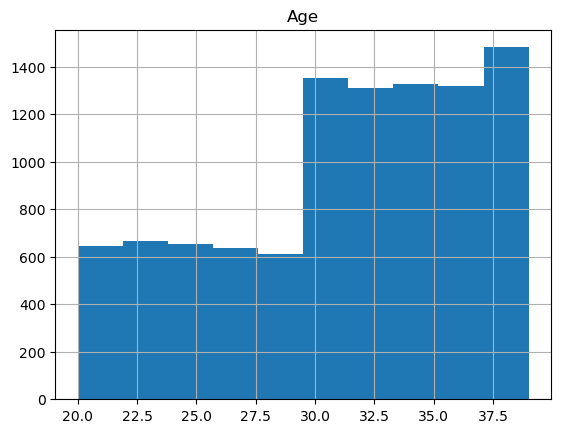

In [73]:
#
data[['Age'].hist()

<AxesSubplot:xlabel='Age', ylabel='Asset'>

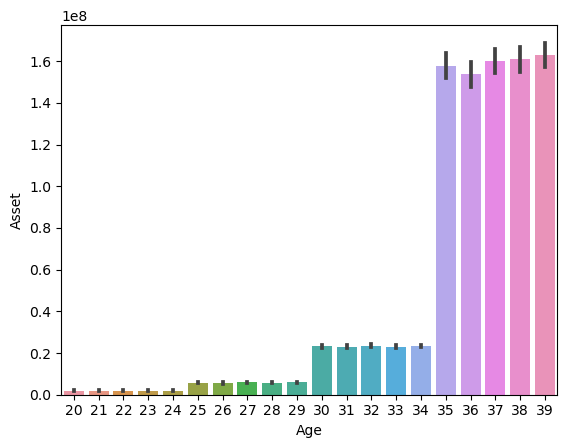

In [70]:
# Age 별 Asset
sns.barplot(data=data, x='Age', y='Asset')

<AxesSubplot:xlabel='Age', ylabel='Domestic_Stock_Ratio'>

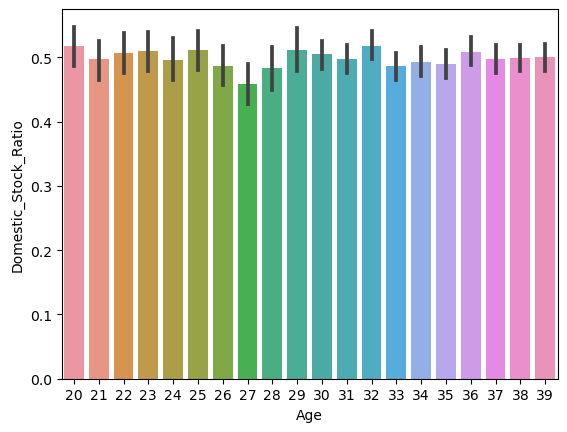

In [71]:
# Age 별 국내주식비율
sns.barplot(data=data, x='Age', y='Domestic_Stock_Ratio')

<AxesSubplot:xlabel='Age'>

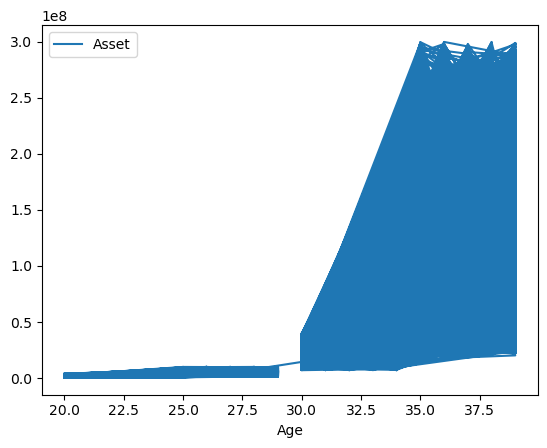

In [49]:
# Age 별 Asset, 국내 주식 비율, 해외 주식 비율, 현금 비율

data[['Age', 'Company', 'Asset']].plot(x='Age')

In [43]:
data.groupby('Company')

In [46]:
data.columns

Index(['Age', 'Gender', 'Company', 'Education_level', 'Asset',
       'Domestic_Stock_Ratio', 'Foreign_Stock_Ratio', 'Cash_Ratio'],
      dtype='object')